# EDA(탐색적 데이터 분석)

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 방지
from matplotlib import rc
#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 음수 표시 설정
plt.rc('axes', unicode_minus=False)


In [4]:
# 데이터 로드하기
bookinf = pd.read_csv('processed_bookInformation.csv.part', low_memory=False)
lendbook = pd.read_csv('processed_data.csv')
inputbook = pd.read_csv('oribookinf.csv')


In [5]:
# 데이터 구조 확인
print(bookinf.head())
print(lendbook.head())
# 데이터 타입 및 결측치 확인하기
print(bookinf.info())
print(lendbook.info())

        도서ID  등록일자    수서방법  분류코드  \
0  SS_270312  2017    학과신청   190   
1  SS_233793  2008  수서정보없음   160   
2  SS_233788  2008  수서정보없음   160   
3  SS_075978  2010   이용자희망   160   
4  SS_297286  2011    사서선정   160   

                                                  서명  \
0  Le courage de la verite :le gouvernement de so...   
1                                         김나지움 논리학입문   
2                                         김나지움 논리학입문   
3                                          선제논리를 향하여   
4                                          선제논리를 향하여   

                               저자  출판년도  소장위치  
0                Foucault, Michel  2009  4층인문  
1  Hegel, Georg Wilhelm Friedrich  2008  보존서고  
2  Hegel, Georg Wilhelm Friedrich  2008  4층인문  
3                             김영정  2010  4층인문  
4                             김영정  2010  보존서고  
        도서ID  대출 년도
0  SS_213406   2004
1  SS_213528   2004
2  SS_213528   2004
3  SS_213529   2004
4  SS_213529   2004
<class 'pandas.core.frame.DataFrame'>


In [6]:
# 저자, 서명, 출판년도가 같은 데이터를 하나의 책으로 묶어서 
# 고유한 책의 개수 계산
unique_books = bookinf.drop_duplicates(subset=['서명','저자','출판년도'])
unique_count = unique_books.shape[0]
print(f"총 고유 책의 개수: {unique_count}권")

총 고유 책의 개수: 180751권


- 총 책 권수 : 301151권
- 총 고유 책의 개수 : 180751권
- 전체 대여 횟수 : 916709


In [7]:
# 기초 통계량 확인하기
print(bookinf.describe())
print(lendbook.describe())

                등록일자           분류코드
count  301151.000000  301151.000000
mean     2008.420380     494.784942
std        10.514741     325.954649
min      1968.000000       0.000000
25%      2002.000000     190.000000
50%      2011.000000     410.000000
75%      2016.000000     800.000000
max      2024.000000     990.000000
               대출 년도
count  916709.000000
mean     2013.511751
std         4.955525
min      2004.000000
25%      2010.000000
50%      2013.000000
75%      2017.000000
max      2024.000000


- 평균적인 등록일자는 2008년이고, 최소 등록년도는 1968년임

In [8]:
# 각 소장 위치별 책 수량 확인
location_counts = bookinf['소장위치'].value_counts()
print(location_counts)

4층인문    162454
보존서고    138697
Name: 소장위치, dtype: int64


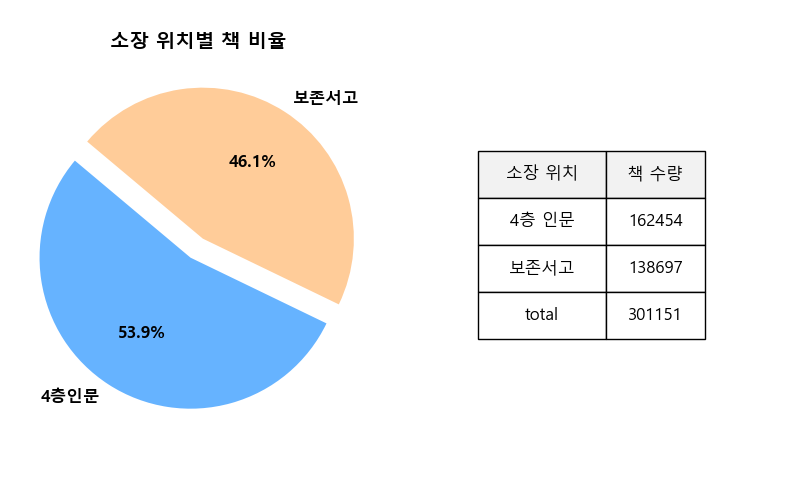

In [9]:
#데이터 키와 값 분리
location = location_counts.index.tolist()
loc_count = location_counts.values.tolist()
#그래프 설정
colors = ['#66b3ff' , '#ffcc99']
explode = [0.1 if i==max(loc_count) else 0.05 for i in loc_count]


plt.figure(figsize=(8,5)) #그래프 크기 설정

plt.subplot(1,2,1)
plt.pie(loc_count,
        labels=location,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,
        colors=colors,
        textprops={'fontsize':12, 'weight':'bold'}
       )
        

#제목 설정
plt.title("소장 위치별 책 비율", fontsize=14, weight='bold')


#총 책 수량 계산
total_books = sum(loc_count)

# 표 데이터 생성
table_data = [
    ["4층 인문", location_counts["4층인문"]],
    ["보존서고", location_counts["보존서고"]],
    ["total", total_books],
]


#표 그리기
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 플롯
plt.axis('off')  # 축 비활성화
table = plt.table(
    cellText=table_data,
    colLabels=["소장 위치", "책 수량"],
    cellLoc='center',
    loc='center',
    colColours=["#f2f2f2", "#f2f2f2"],
    bbox=[0.2,0.3,0.6,0.4]
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(table_data[0]))))

# 그래프 출력
plt.tight_layout()
plt.show()



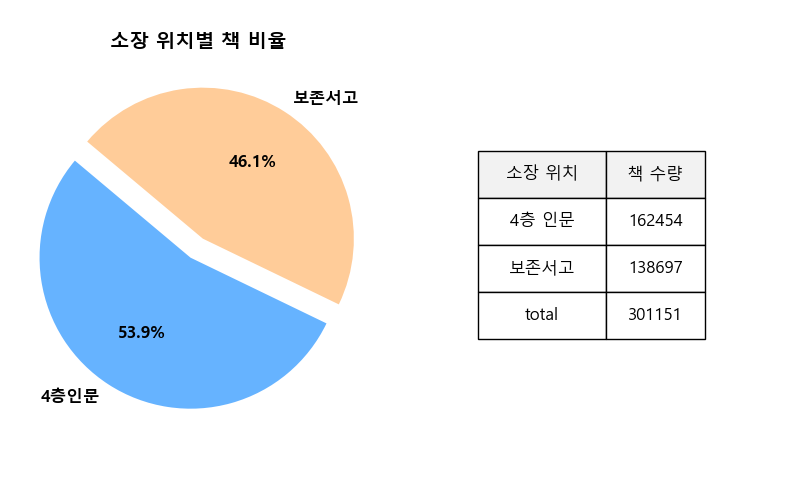

In [10]:
#데이터 키와 값 분리
location = location_counts.index.tolist()
loc_count = location_counts.values.tolist()
#그래프 설정
colors = ['#66b3ff' , '#ffcc99']
explode = [0.1 if i==max(loc_count) else 0.05 for i in loc_count]


plt.figure(figsize=(8,5)) #그래프 크기 설정

plt.subplot(1,2,1)
plt.pie(loc_count,
        labels=location,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,
        colors=colors,
        textprops={'fontsize':12, 'weight':'bold'}
       )
        

#제목 설정
plt.title("소장 위치별 책 비율", fontsize=14, weight='bold')


#총 책 수량 계산
total_books = sum(loc_count)

# 표 데이터 생성
table_data = [
    ["4층 인문", location_counts["4층인문"]],
    ["보존서고", location_counts["보존서고"]],
    ["total", total_books],
]


#표 그리기
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 플롯
plt.axis('off')  # 축 비활성화
table = plt.table(
    cellText=table_data,
    colLabels=["소장 위치", "책 수량"],
    cellLoc='center',
    loc='center',
    colColours=["#f2f2f2", "#f2f2f2"],
    bbox=[0.2,0.3,0.6,0.4]
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(table_data[0]))))

# 그래프 출력
plt.tight_layout()
plt.show()



In [11]:
print(type(location_counts))

<class 'pandas.core.series.Series'>


## 입고량 검색
- 년도별로

In [12]:
#년도별로 검색
#복사본부터 만들어 보자
inputbook_copy = inputbook.copy()
inputbook_copy['등록일자']=pd.to_datetime(inputbook_copy['등록일자'],errors='coerce')
inputbook_copy['등록연도']=inputbook_copy['등록일자'].dt.year
yearly_counts = inputbook_copy['등록연도'].value_counts().sort_index()
print(yearly_counts)

1968      119
1969      350
1970      581
1971      678
1972      543
1973     1049
1974      553
1975      393
1976      454
1977      387
1978      444
1979      568
1980      379
1981      506
1982      386
1983      504
1984      438
1985      405
1986      406
1987      554
1988      303
1989      369
1990      394
1991      313
1992      426
1993      491
1994    12597
1995    29076
1996     3798
1997     6311
1998     3359
1999     2898
2000     2452
2001     2715
2002     8575
2003     5002
2004     2977
2005     4796
2006     7437
2007     5933
2008     7398
2009     9244
2010    14236
2011    17529
2012    15385
2013    16906
2014    12421
2015    11929
2016    13958
2017    13940
2018    12986
2019     9821
2020     9058
2021     7478
2022     8418
2023     6889
2024     3636
Name: 등록연도, dtype: int64


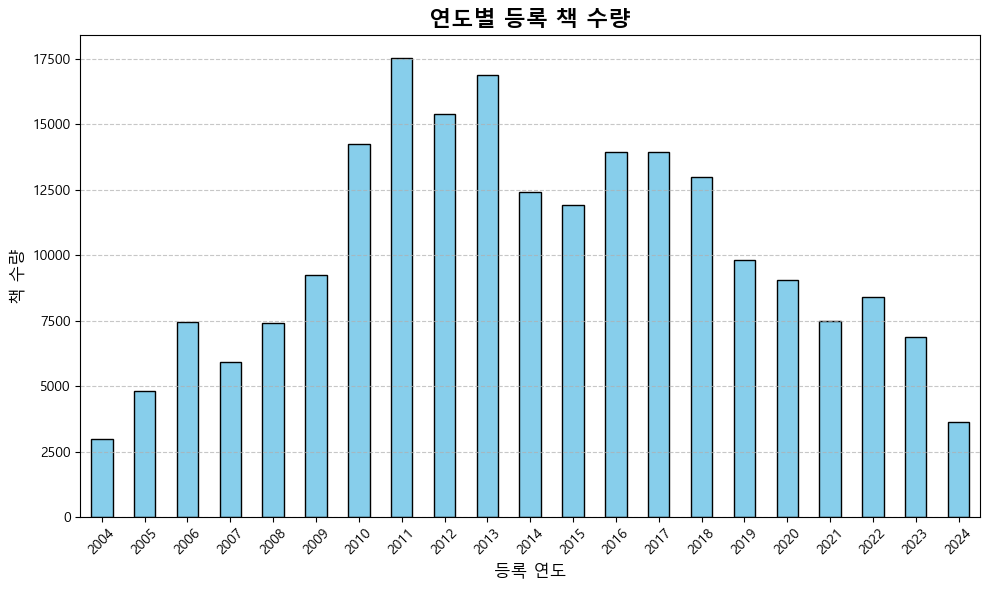

In [101]:
# 시각화하기
plt.figure(figsize=(10,6))
yearly_counts.plot(kind='bar', color='skyblue', edgecolor='black')

#그래프 제목 및 레이블 설정
plt.title('연도별 등록 책 수량', fontsize=16, weight='bold')
plt.xlabel('등록 연도', fontsize=12)
plt.ylabel('책 수량', fontsize=12)

#x축 눈금 각도 설정
plt.xticks(rotation=45, fontsize=10)

#y축 격자선 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

#그래프 출력
plt.tight_layout()
plt.show()

## 분류 코드 별 점유 비율

In [14]:
#데이터의 최대값 확인
max_code = bookinf['분류코드'].max()

#최대값 기반으로 범위 생성
bins = list(range(0, max_code + 101 , 100))
labels = bins[:-1]

#분류코드를 구간으로 묶기
bookinf['분류코드_범위'] = pd.cut(bookinf['분류코드'], bins=bins, labels=labels, right=False, include_lowest=True)

#범위별 데이터 개수 계산
group_counts = bookinf['분류코드_범위'].value_counts().sort_index()
group_counts = group_counts[group_counts > 0 ]
#전체 데이터 개수
total_count = len(bookinf)
#점유 비율 계산
group_ratios = (group_counts/total_count) * 100

#필요 없는 데이터 제거
group_ratios = group_ratios[group_ratios >0]

#결과 출력
print("유효한 범위의 그룹 개수:")
print(group_counts)
print("\n유효한 범위의 점유 비율:")
print(group_ratios)


유효한 범위의 그룹 개수:
0      24093
100    54722
200    53821
300     5549
400    31016
500        7
600    10309
700    41226
800    15030
900    65378
Name: 분류코드_범위, dtype: int64

유효한 범위의 점유 비율:
0       8.000305
100    18.170951
200    17.871765
300     1.842597
400    10.299152
500     0.002324
600     3.423200
700    13.689478
800     4.990852
900    21.709375
Name: 분류코드_범위, dtype: float64


In [15]:
#group_counts 총합 계싼
group_counts_total = group_counts.sum()

#total_count와 비교
if group_counts_total == total_count:
    print(f"일치합니다! 유효합 데이터 총합({group_counts_total})과 전체 데이터 개수({total_count})가 같습니다.")
else:
    print(f"일치하지 않습니다!")

일치합니다! 유효합 데이터 총합(301151)과 전체 데이터 개수(301151)가 같습니다.


In [16]:
# 디버깅을 위해 값 출력
print(f"group_counts 총합: {group_counts_total}")
print(f"전체 데이터 개수: {total_count}")

group_counts 총합: 301151
전체 데이터 개수: 301151


In [17]:
print(f"생성된 bins: {bins}")
print(f"생성된 labels: {labels}")

생성된 bins: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
생성된 labels: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]


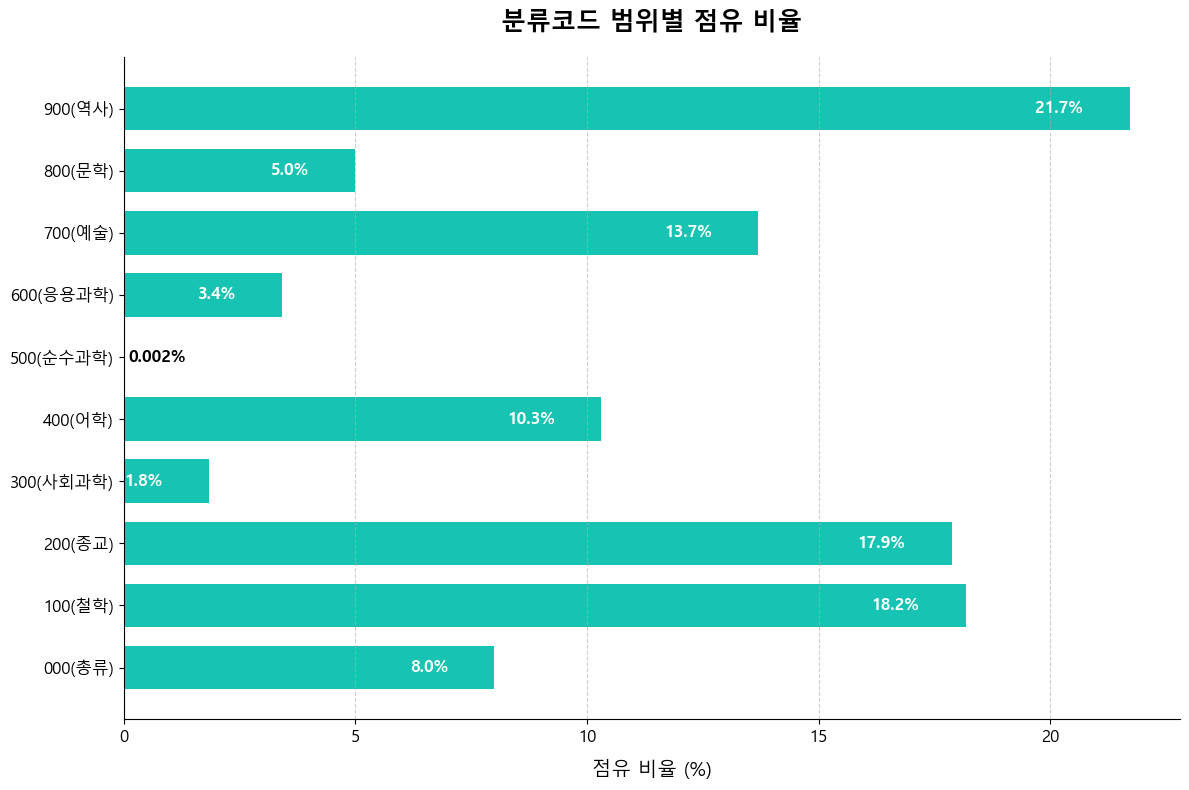

In [18]:
#파이차트 만들기
#데이터 준비
labels = [
    "000(총류)", "100(철학)", "200(종교)", "300(사회과학)", "400(어학)", 
    "500(순수과학)", "600(응용과학)", "700(예술)", "800(문학)", "900(역사)"
]  # 사용자 정의 레이블
sizes = group_ratios.values #점유 비율

#그래프 크기 설정
plt.figure(figsize=(12,8))

#가로 막대 그래프 그리기
bars = plt.barh(labels, sizes, color='#17c3b2', height=0.7)

#막대 내부 퍼센트 값 추가
for bar, size, labels in zip(bars, sizes, labels):
    # 500 범위일 경우 소수점 세 자리로 표시
    if labels == "500(순수과학)":
        text=f'{size:.3f}%'
    else:
        text=f'{size:.1f}%'
    
    #텍스트 위치 결정
    if size<1:
        plt.text(
            size + 0.1,  # 막대 오른쪽에 약간의 간격 추가
            bar.get_y() + bar.get_height() / 2,  # 막대의 중앙 높이에 위치
            text,
            va='center',  # 수직 정렬: 가운데
            ha='left',  # 수평 정렬: 왼쪽
            color='black',  # 글자 색상: 검정색
            fontsize=12,  # 글자 크기
            fontweight='bold'  # 글자 굵기
        )
        
    else:
        plt.text(
            size -1 ,
            bar.get_y() + bar.get_height() /2,
            text,
            va='center',
            ha='right',
            color='white',
            fontweight='bold',
            fontsize=12
        )

#그래프 제목 및 레이블 설정
plt.title('분류코드 범위별 점유 비율', fontsize=18, weight='bold', pad=20)
plt.xlabel('점유 비율 (%)', fontsize=14, labelpad=10)
plt.ylabel('')

#x축 비율 표시 형식 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#그래프 테두리 설정
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#y축 격자선 추가
plt.grid(axis='x', linestyle='--', alpha=0.6)

#그래프 출력
plt.tight_layout()
plt.show()



In [19]:
pip install calmap

In [20]:
import calmap

In [39]:
# 출판년도 컬럼이 datetime 형식이 아니라면 변환 (숫자가 아니라면 NaT 처리)
bookinf['출판년도'] = pd.to_numeric(bookinf['출판년도'], errors='coerce')
# '소장위치' 컬럼에서 '보존서고'인 데이터만 필터링
storage_books = bookinf[bookinf['소장위치'] == '보존서고']

In [40]:
# 출판년도를 10년 단위로 그룹화하기 위해 pd.cut()을 사용합니다.
# 10년 단위 구간 생성
bins = list(range(1900, 2031, 10))  # 1900년부터 2030년까지 10년 단위로 끊음
labels = [f"{start}s" for start in bins[:-1]]  # 예: "1900s", "1910s", ..., "2020s"

In [41]:
# '보존서고'에 있는 데이터만 명확히 복사
storage_books = bookinf[bookinf['소장위치'] == '보존서고'].copy()

# 출판년도 구간을 새로운 컬럼으로 추가
storage_books['출판연도_구간'] = pd.cut(storage_books['출판년도'], bins=bins, labels=labels, right=False)


In [42]:
# 그룹별 개수 계산
yearly_counts = storage_books['출판연도_구간'].value_counts().sort_index()

In [43]:
# 총 도서 수 대비 비율 계산
yearly_ratios = (yearly_counts / yearly_counts.sum()) * 100

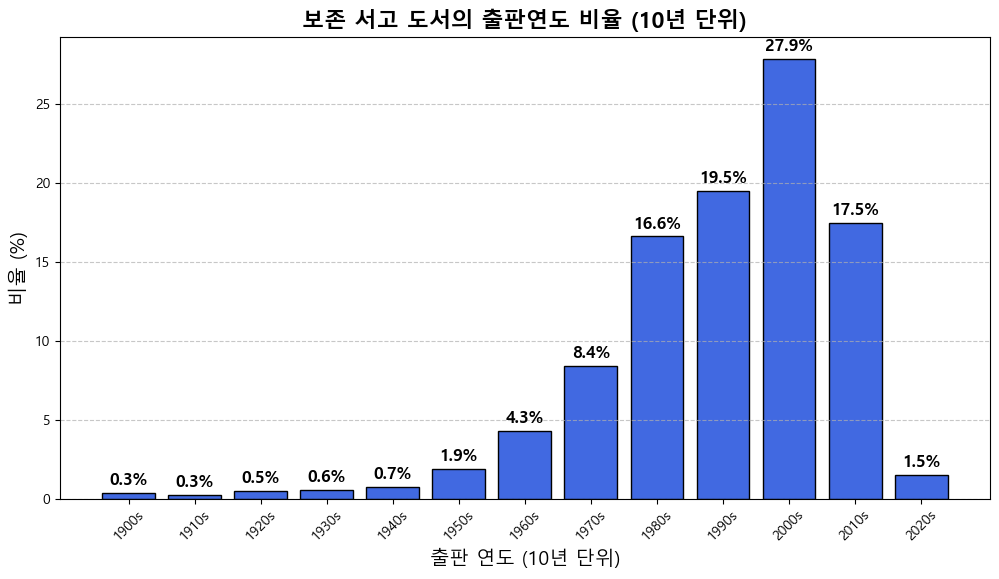

In [100]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_ratios.index, yearly_ratios.values, color='#4169E1', edgecolor='black')

# 그래프 설정
plt.title('보존 서고 도서의 출판연도 비율 (10년 단위)', fontsize=16, weight='bold')
plt.xlabel('출판 연도 (10년 단위)', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 퍼센트 표시 추가
for i, v in enumerate(yearly_ratios.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

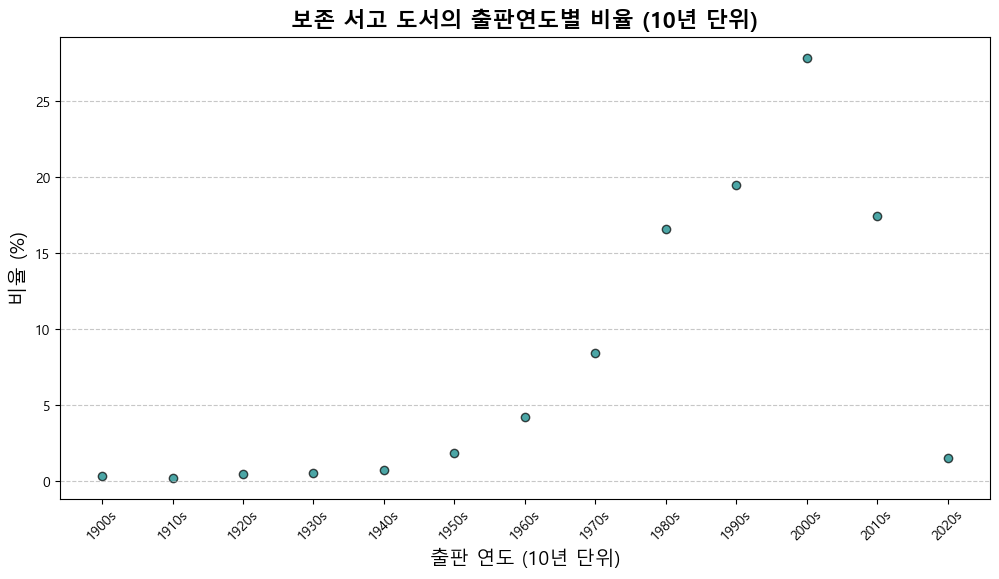

In [33]:
# 정렬 보장
yearly_counts = storage_books['출판연도_구간'].value_counts().sort_index()
yearly_ratios = (yearly_counts / yearly_counts.sum()) * 100

# X축과 Y축 크기 확인
if len(yearly_counts) != len(yearly_ratios):
    print("❌ X축과 Y축 크기가 일치하지 않습니다. 데이터 정렬 확인 필요!")
    print("✅ yearly_counts 크기:", len(yearly_counts))
    print("✅ yearly_ratios 크기:", len(yearly_ratios))
else:
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(yearly_counts)), yearly_ratios.values, alpha=0.7, color='teal', edgecolors='black')

    # X축 라벨을 문자열로 표시
    plt.xticks(range(len(yearly_counts)), yearly_counts.index, rotation=45)

    # 그래프 설정
    plt.title('보존 서고 도서의 출판연도별 비율 (10년 단위)', fontsize=16, weight='bold')
    plt.xlabel('출판 연도 (10년 단위)', fontsize=14)
    plt.ylabel('비율 (%)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

In [36]:
# '등록년도'가 숫자인지 확인하고 변환
bookinf['등록일자'] = pd.to_numeric(bookinf['등록일자'], errors='coerce')

# '소장위치'가 '보존서고'인 도서만 필터링
storage_books = bookinf[bookinf['소장위치'] == '보존서고'].copy()

# 10년 단위 구간 생성 (예: 1900s, 1910s, ..., 2020s)
bins = list(range(1900, 2031, 10))  # 1900년부터 2030년까지 10년 단위
labels = [f"{start}s" for start in bins[:-1]]

# 등록년도 기준으로 10년 단위 범위 생성
storage_books['등록연도_구간'] = pd.cut(storage_books['등록일자'], bins=bins, labels=labels, right=False)

# 10년 단위 개수 및 비율 계산
yearly_counts = storage_books['등록연도_구간'].value_counts().sort_index()
yearly_ratios = (yearly_counts / yearly_counts.sum()) * 100


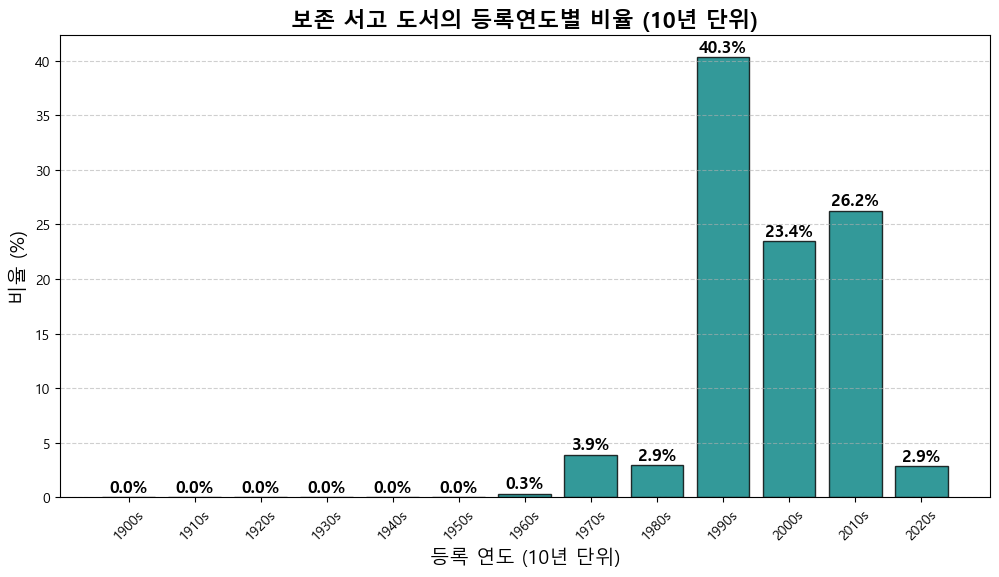

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_counts.index, yearly_ratios.values, color='teal', alpha=0.8, edgecolor='black')

# 그래프 제목 및 레이블
plt.title('보존 서고 도서의 등록연도별 비율 (10년 단위)', fontsize=16, weight='bold')
plt.xlabel('등록 연도 (10년 단위)', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)
plt.xticks(rotation=45)

# 데이터 값 추가 (막대 위)
for bar, ratio in zip(bars, yearly_ratios.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{ratio:.1f}%", 
             ha='center', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)  # 가독성을 위한 y축 격자선
plt.show()


In [54]:
# 🔹 대출 연도별 건수 계산
loan_counts = lendbook['대출 년도'].value_counts().sort_index()

In [55]:
# 🔹 총 대출 건수
total_loans = loan_counts.sum()

In [57]:
# 🔹 대출 비율 계산 (%)
loan_ratios = (loan_counts / total_loans) * 100
# 🔹 데이터 확인
print(loan_ratios)

2004    0.641316
2005    3.107420
2006    4.126173
2007    4.920536
2008    5.294374
2009    6.037248
2010    6.414795
2011    6.697000
2012    7.019349
2013    7.389804
2014    7.029494
2015    6.865537
2016    6.063102
2017    5.943216
2018    4.940063
2019    4.466630
2020    2.993753
2021    2.493049
2022    2.565263
2023    2.630169
2024    2.361709
Name: 대출 년도, dtype: float64


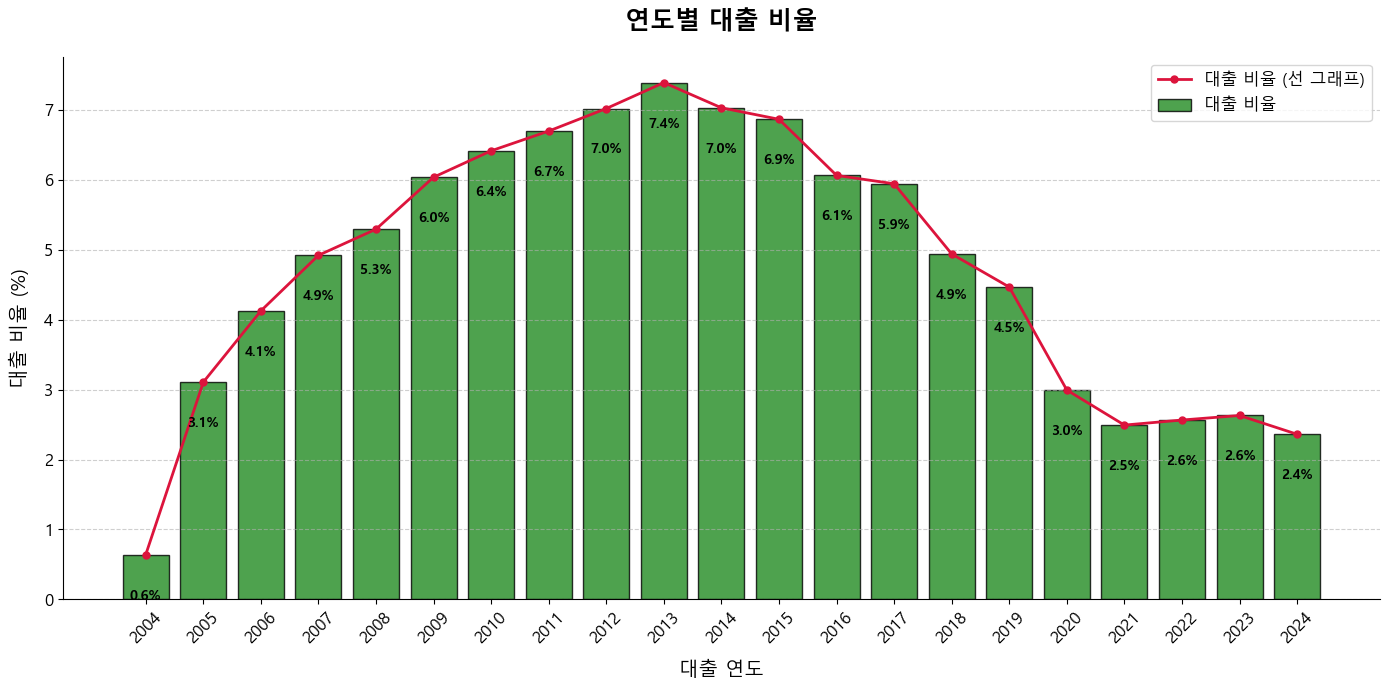

In [99]:
# 🔹 시각화
plt.figure(figsize=(14, 7))

# 🔹 막대 그래프
bars = plt.bar(loan_ratios.index, loan_ratios.values, color='#228B22', alpha=0.8, edgecolor='black', label='대출 비율')

# 🔹 선 그래프 추가
plt.plot(loan_ratios.index, loan_ratios.values, color='#DC143C', marker='o', linestyle='-', linewidth=2, markersize=5, label='대출 비율 (선 그래프)')

# 🔹 막대 내부에 비율 값 추가
for bar, ratio in zip(bars, loan_ratios.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, f"{ratio:.1f}%", 
             ha='center', va='top', fontsize=10, fontweight='bold', color='black')

# 🔹 그래프 제목 및 레이블
plt.title('연도별 대출 비율', fontsize=18, weight='bold', pad=20)
plt.xlabel('대출 연도', fontsize=14, labelpad=10)
plt.ylabel('대출 비율 (%)', fontsize=14, labelpad=10)

# 🔹 X축 모든 연도 표시
plt.xticks(loan_ratios.index, rotation=45, fontsize=12)

# 🔹 Y축 눈금 설정
plt.yticks(fontsize=12)

# 🔹 그래프 테두리 설정
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 🔹 Y축 격자선 추가
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 🔹 범례 추가
plt.legend(fontsize=12)

# 🔹 그래프 출력
plt.tight_layout()
plt.show()

In [85]:
inputbook_copy = inputbook.copy()
inputbook_copy['등록일자']=pd.to_datetime(inputbook_copy['등록일자'],errors='coerce')
inputbook_copy['등록연도']=inputbook_copy['등록일자'].dt.year
yearly_counts = inputbook_copy['등록연도'].value_counts().sort_index()

# 인덱스를 문자열로 변환 후 정수형으로 변환
yearly_counts.index = yearly_counts.index.astype(str).astype(int)

# 2004년 이후 데이터만 필터링
all_years = np.arange(2004, 2025)
yearly_counts = yearly_counts.reindex(all_years, fill_value=0)
print(yearly_counts)

2004     2977
2005     4796
2006     7437
2007     5933
2008     7398
2009     9244
2010    14236
2011    17529
2012    15385
2013    16906
2014    12421
2015    11929
2016    13958
2017    13940
2018    12986
2019     9821
2020     9058
2021     7478
2022     8418
2023     6889
2024     3636
Name: 등록연도, dtype: int64


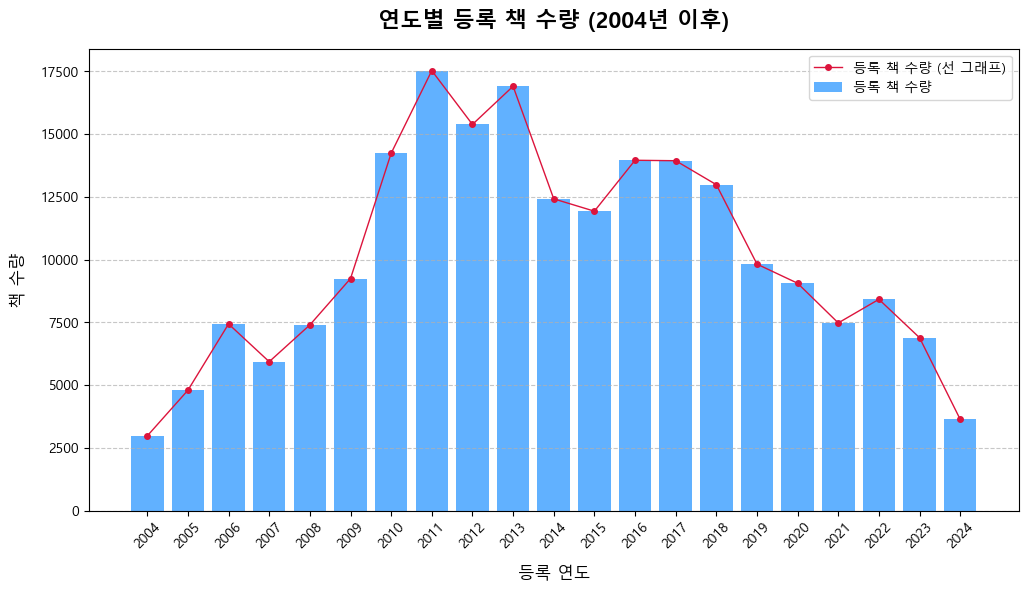

In [89]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 막대 그래프 추가
plt.bar(yearly_counts.index, yearly_counts.values, color='#1E90FF', label='등록 책 수량', alpha=0.7)

# 선 그래프 추가
plt.plot(yearly_counts.index, yearly_counts.values, color='#DC143C', marker='o', linestyle='-', linewidth=1, markersize=4, label='등록 책 수량 (선 그래프)')

# 제목 및 라벨 설정
plt.title('연도별 등록 책 수량 (2004년 이후)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('등록 연도', fontsize=12, labelpad=10)
plt.ylabel('책 수량', fontsize=12, labelpad=10)

# x축 눈금 회전
plt.xticks(yearly_counts.index, rotation=45)

# y축 격자선 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

### 대출 데이터와 도서 정보를 병합 (JOIN)

In [93]:
# 대출 데이터와 도서 정보를 병합 (도서ID 기준, 예: '도서ID' 또는 'book_id'가 있다고 가정)
merged_data = lendbook.merge(bookinf[['도서ID', '분류코드']], on='도서ID', how='left')

# 병합 후 분류코드가 없는 데이터는 제거 (대출 내역이 있지만 분류코드가 없는 경우)
merged_data = merged_data.dropna(subset=['분류코드'])

# 분류코드를 정수형으로 변환
merged_data['분류코드'] = merged_data['분류코드'].astype(int)


In [94]:
# 분류코드를 100단위로 그룹화
bins = list(range(0, bookinf['분류코드'].max() + 101, 100))
labels = [
    "000(총류)", "100(철학)", "200(종교)", "300(사회과학)", "400(어학)", 
    "500(순수과학)", "600(응용과학)", "700(예술)", "800(문학)", "900(역사)"
]

# '분류코드_범위' 컬럼 생성
merged_data['분류코드_범위'] = pd.cut(merged_data['분류코드'], bins=bins, labels=labels, right=False, include_lowest=True)

# 범위별 대출 횟수 계산
group_loan_counts = merged_data['분류코드_범위'].value_counts().sort_index()

# 전체 대출 횟수 대비 비율 계산
total_loans = group_loan_counts.sum()
group_loan_ratios = (group_loan_counts / total_loans) * 100


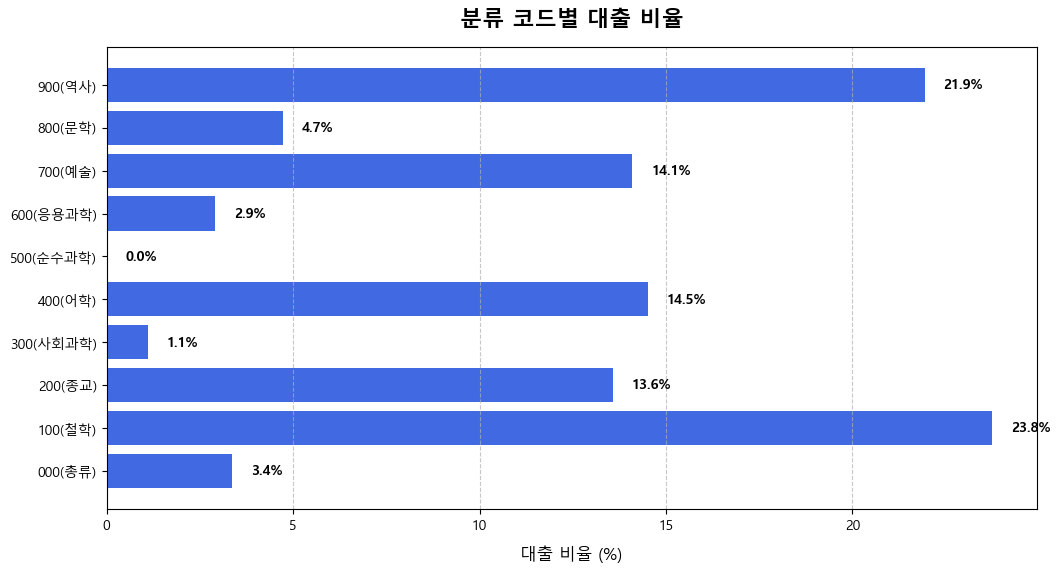

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.barh(labels, group_loan_ratios, color='royalblue')

# 막대 내부에 대출 비율 표시
for bar, ratio in zip(bars, group_loan_ratios):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{ratio:.1f}%', 
             va='center', fontsize=10, fontweight='bold')

# 그래프 설정
plt.title('분류 코드별 대출 비율', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('대출 비율 (%)', fontsize=12, labelpad=10)
plt.ylabel('')

# x축 격자선 추가
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


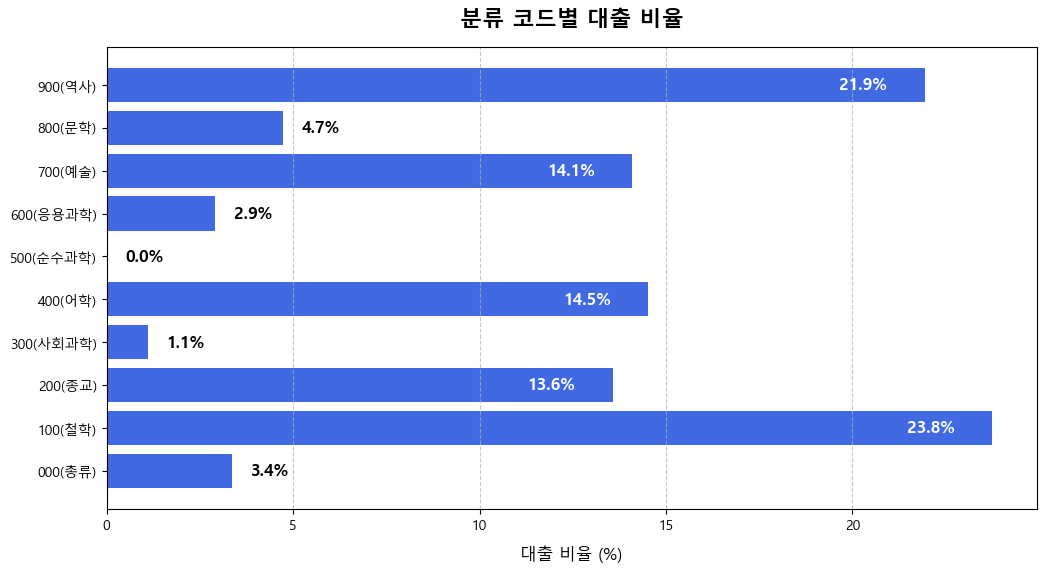

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.barh(labels, group_loan_ratios, color='royalblue')

# 막대 내부에 대출 비율 표시 (길이에 따라 내부/외부 조정)
for bar, ratio in zip(bars, group_loan_ratios):
    if ratio > 10:  # 막대가 충분히 길면 내부에 흰색 텍스트
        plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height() / 2, 
                 f'{ratio:.1f}%', va='center', ha='right', color='white', fontsize=12, fontweight='bold')
    else:  # 막대가 짧으면 바깥에 검정색으로 표시
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
                 f'{ratio:.1f}%', va='center', ha='left', color='black', fontsize=12, fontweight='bold')

# 그래프 설정
plt.title('분류 코드별 대출 비율', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('대출 비율 (%)', fontsize=12, labelpad=10)
plt.ylabel('')

# x축 격자선 추가
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()
